In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling/dumas_zola-llda-doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname=docname.replace('Zola-Emile','').replace('Dumas-Alexandre','')
        mallet_docnames.append(docname[6:-4])
        print(docname[6:-4])
        index_topic=0
        for share in grouper(1, values):
            triple = (docname[6:-4], index_topic, float(share[0]))
            doctopic_triples.append(triple)
            index_topic+=1

La-curee
Pot-Bouille
Le-Comte-de-Monte-Cristo
Germinal
L-assomoir
La-faute-de-l-abbe-Mouret
Nana
La-Tulipe-noire
La-San-Felice
Les-Trois-Mousquetaires
Pere_La-fille-du-marquis-II
La-dame-aux-camelias
Une-page-d-amour
Pere_La-femme-au-collier-de-velours
Pere_Black
Les-Blancs-et-les-Bleus
Pere_Jane
La-fortune-des-Rougon
Au-bonheur-des-dames
Les-Louves-de-Machecoul
La-comtesse-de-Charny
Pere_Le-docteur-mysterieux-II
Vingt-ans-apres
Pere_sultanetta
Pere_Le-page-du-duc-de-Savoie-I
La-Reine-Margot


In [5]:
print(doctopic_triples)

[('La-curee', 0, 0.0776989218589528), ('La-curee', 1, 0.8454771960042923), ('La-curee', 2, 0.0768238821367549), ('Pot-Bouille', 0, 0.03722051964268954), ('Pot-Bouille', 1, 0.8800177920694706), ('Pot-Bouille', 2, 0.08276168828783977), ('Le-Comte-de-Monte-Cristo', 0, 0.2694041986543734), ('Le-Comte-de-Monte-Cristo', 1, 0.22916578636336746), ('Le-Comte-de-Monte-Cristo', 2, 0.501430014982259), ('Germinal', 0, 0.14867219142955612), ('Germinal', 1, 0.8442737761364391), ('Germinal', 2, 0.0070540324340048), ('L-assomoir', 0, 0.0390537500041543), ('L-assomoir', 1, 0.9510723080962336), ('L-assomoir', 2, 0.009873941899612156), ('La-faute-de-l-abbe-Mouret', 0, 0.08766045168870079), ('La-faute-de-l-abbe-Mouret', 1, 0.9032944187488808), ('La-faute-de-l-abbe-Mouret', 2, 0.009045129562418382), ('Nana', 0, 0.05222820496395911), ('Nana', 1, 0.8568839419276318), ('Nana', 2, 0.09088785310840904), ('La-Tulipe-noire', 0, 0.5141034658388106), ('La-Tulipe-noire', 1, 0.19735150736096627), ('La-Tulipe-noire', 2

In [6]:
mallet_docnames = sorted(mallet_docnames)

In [7]:
num_docs = len(mallet_docnames)

In [8]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [9]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

78
3


In [10]:
doctopic = np.zeros((num_docs, num_topics))

In [11]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [12]:
novel_names = []

In [13]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

26


In [14]:
novel_names = np.asarray(novel_names)

In [15]:
doctopic

array([[ 0.06559837,  0.91279529,  0.02160634],
       [ 0.14867219,  0.84427378,  0.00705403],
       [ 0.03905375,  0.95107231,  0.00987394],
       [ 0.13564586,  0.10685505,  0.75749909],
       [ 0.65775655,  0.07223581,  0.27000763],
       [ 0.51410347,  0.19735151,  0.28854503],
       [ 0.51242084,  0.0972342 ,  0.39034496],
       [ 0.07769892,  0.8454772 ,  0.07682388],
       [ 0.15825486,  0.47322233,  0.3685228 ],
       [ 0.08766045,  0.90329442,  0.00904513],
       [ 0.31493699,  0.66409205,  0.02097096],
       [ 0.2694042 ,  0.22916579,  0.50143001],
       [ 0.75680994,  0.11530893,  0.12788113],
       [ 0.59071855,  0.19747751,  0.21180394],
       [ 0.18177622,  0.08838385,  0.72983993],
       [ 0.0522282 ,  0.85688394,  0.09088785],
       [ 0.4219277 ,  0.30211482,  0.27595749],
       [ 0.55931145,  0.25333555,  0.187353  ],
       [ 0.39166978,  0.45067787,  0.15765234],
       [ 0.53344736,  0.32271812,  0.14383452],
       [ 0.77851407,  0.10081961,  0.120

In [16]:
doctopic_orig = doctopic.copy()

In [17]:
num_groups = len(set(novel_names))
print(num_groups)

26


In [18]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [19]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [20]:
doctopic = doctopic_grouped

In [21]:
doctopic

array([[ 0.06559837,  0.91279529,  0.02160634],
       [ 0.14867219,  0.84427378,  0.00705403],
       [ 0.03905375,  0.95107231,  0.00987394],
       [ 0.13564586,  0.10685505,  0.75749909],
       [ 0.65775655,  0.07223581,  0.27000763],
       [ 0.51410347,  0.19735151,  0.28854503],
       [ 0.51242084,  0.0972342 ,  0.39034496],
       [ 0.07769892,  0.8454772 ,  0.07682388],
       [ 0.15825486,  0.47322233,  0.3685228 ],
       [ 0.08766045,  0.90329442,  0.00904513],
       [ 0.31493699,  0.66409205,  0.02097096],
       [ 0.2694042 ,  0.22916579,  0.50143001],
       [ 0.75680994,  0.11530893,  0.12788113],
       [ 0.59071855,  0.19747751,  0.21180394],
       [ 0.18177622,  0.08838385,  0.72983993],
       [ 0.0522282 ,  0.85688394,  0.09088785],
       [ 0.4219277 ,  0.30211482,  0.27595749],
       [ 0.55931145,  0.25333555,  0.187353  ],
       [ 0.39166978,  0.45067787,  0.15765234],
       [ 0.53344736,  0.32271812,  0.14383452],
       [ 0.77851407,  0.10081961,  0.120

In [22]:
CORPUS_PATH = os.path.join('txt', 'dumas')
print(CORPUS_PATH)
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

txt/dumas


In [23]:
N, K = doctopic.shape
print(K)

3


In [24]:
ind = np.arange(N)

In [25]:
width = 0.5

In [26]:
plt.rcParams["figure.figsize"] = [16,9]

In [27]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 26 artists>

In [28]:
plt.xticks(ind + width/2, range(1,len(novel_names)))

([<matplotlib.axis.XTick at 0x7ff830c4a630>,
 <a list of 25 Text xticklabel objects>)

In [29]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

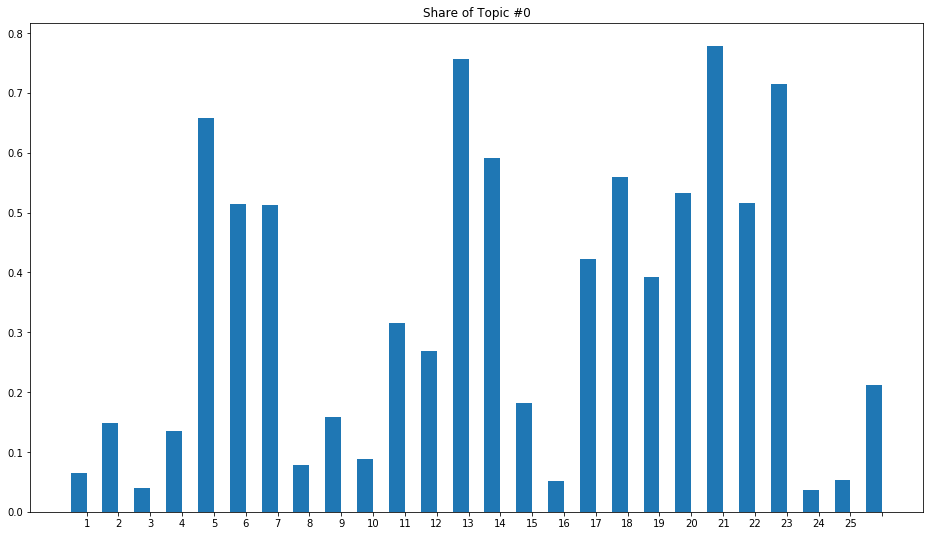

In [30]:
plt.show()

In [31]:
plots = []

In [32]:
height_cumulative = np.zeros(N)

In [33]:
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
        height_cumulative += doctopic[:, k]
    plots.append(p)

In [34]:
plt.ylim((0, 1))

(0, 1)

In [35]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [36]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [37]:
plt.xticks(ind+width/2, range(1,len(novel_names)))
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Au-bonheur-des-dames
numero 2
Germinal
numero 3
L-assomoir
numero 4
La-Reine-Margot
numero 5
La-San-Felice
numero 6
La-Tulipe-noire
numero 7
La-comtesse-de-Charny
numero 8
La-curee
numero 9
La-dame-aux-camelias
numero 10
La-faute-de-l-abbe-Mouret
numero 11
La-fortune-des-Rougon
numero 12
Le-Comte-de-Monte-Cristo
numero 13
Les-Blancs-et-les-Bleus
numero 14
Les-Louves-de-Machecoul
numero 15
Les-Trois-Mousquetaires
numero 16
Nana
numero 17
Pere_Black
numero 18
Pere_Jane
numero 19
Pere_La-femme-au-collier-de-velours
numero 20
Pere_La-fille-du-marquis-II
numero 21
Pere_Le-docteur-mysterieux-II
numero 22
Pere_Le-page-du-duc-de-Savoie-I
numero 23
Pere_sultanetta
numero 24
Pot-Bouille
numero 25
Une-page-d-amour
numero 26
Vingt-ans-apres


In [38]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7ff7f81bcd30>],
 <a list of 1 Text yticklabel objects>)

In [39]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

In [40]:
plt.legend([p[0] for p in plots], topic_labels)

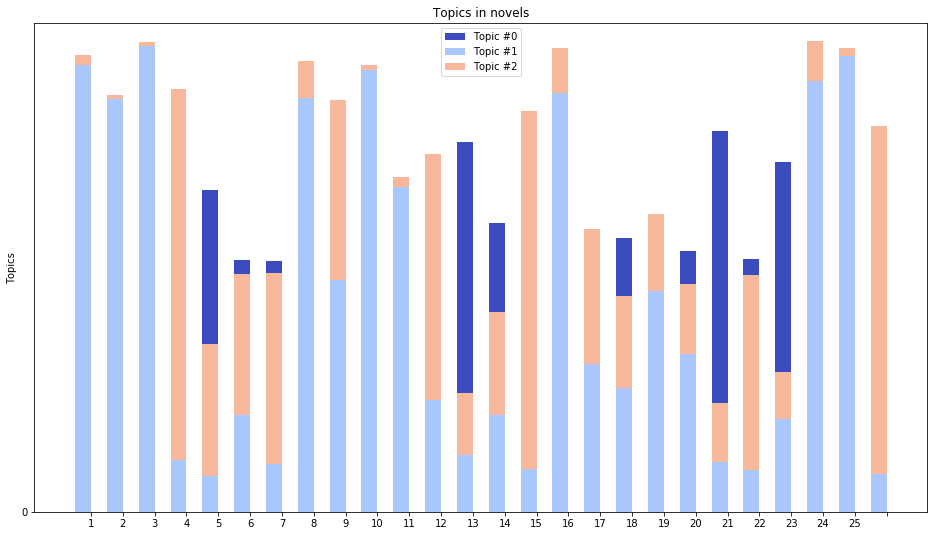

In [41]:
plt.show()